In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from globals import *

Pour le compte rendu : 

- Expliquer kalman classique

- Faire quelques figures, changer les params et montrer les diffs

- Bien expliquer les différences entre EKF et KF.

- Faire la démo pour montrer les équations d'updates avec le nouveau modèle linéarisé

- Faire une comparaison entre EKF et KF.

- Faire varier les paramètres, expliquer les résultats !

# Partie 1 : le filtre de Kalman

In [33]:
################################################
############# Global  var init #################
################################################

T_e = 1
T = 100
sigma_Q = 10 # default 10
sigma_px = 300 # default 30
sigma_py = 300 # default 30

F = np.eye(4)
F[0, 1], F[2, 3] = T_e, T_e
Q = np.array([
    [T_e**3/3, T_e**2/2, 0, 0],
    [T_e**2/2, T_e, 0, 0],
    [0, 0, T_e**3/3, T_e**2/2],
    [0, 0, T_e**2/2, T_e]], dtype='float64'
)*sigma_Q**2

H = np.zeros((2, 4))
H[0, 0], H[1, 2] = 1, 1
R = np.diag([sigma_px**2, sigma_py**2])

x_init = np.array([3, 40, -4, 20])

x_kalm = x_init  # x^_0|0
P_kalm = np.eye(4)  # P_0|0

# Pour la version EKF:
sigma_dist = 10
sigma_angle = np.pi/180
R_EKF = np.diag([sigma_angle**2, sigma_dist**2])


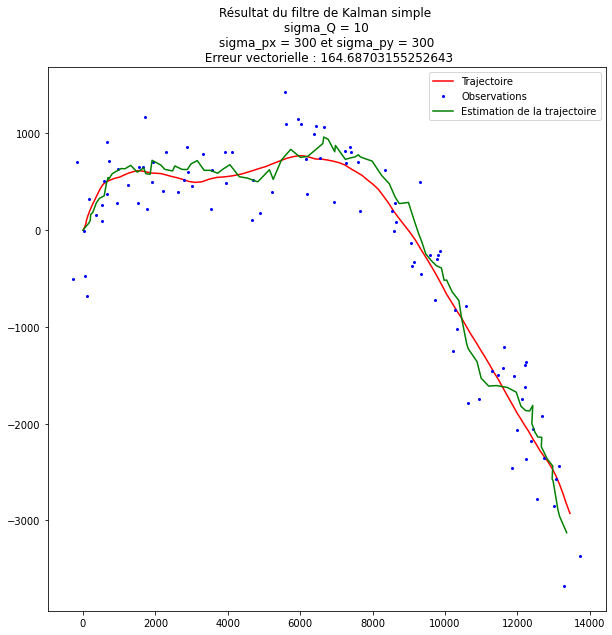

In [4]:
from function_pool_part_1 import *
vecteur_x = creer_trajectoire(F, Q, x_init, T)
vecteur_y = creer_observations(H, R, vecteur_x, T)

# Estimation des états
x_est = np.zeros((4, T))
P_est = np.zeros((4, 4, T))
x_est[:,0],  P_est[:, :,0] = x_kalm, P_kalm
for i in range(1,T):
    x_est[:,i],  P_est[:, :,i] = filtre_de_kalman(F, Q, H, R, vecteur_y[:,i], x_est[:,i-1], P_est[:, :,i-1])

# Affiche les valeurs :
draw_all(vecteur_x, vecteur_y, x_est, sigma_Q, sigma_px, sigma_py, erreur_quad(x_est, vecteur_x))

# Partie 2 : l'EKF

On réutilise l'implémentation classique mais on ajoute le cadre de l'EKF

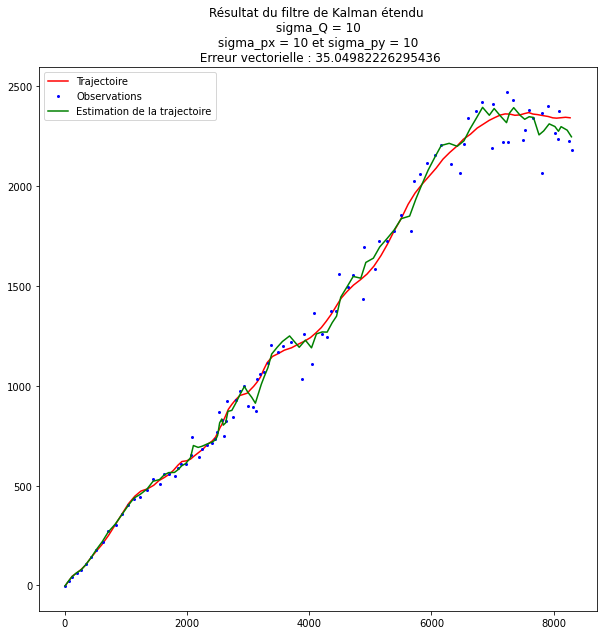

In [49]:
from function_pool_part_2 import *

# Même exercice mais avec l'EKF:
vecteur_x = creer_trajectoire(F, Q, x_init, T)
vecteur_y = creer_observation_EKF(R_EKF, vecteur_x, T)

# Estimation des états
x_est = np.zeros((4, T))
P_est = np.zeros((4, 4, T))
x_est[:,0],  P_est[:, :,0] = x_kalm, P_kalm
for i in range(1,T):
    x_est[:,i],  P_est[:, :,i] = filtre_de_kalman_extended(F, Q, R_EKF, vecteur_y[:,i], x_est[:,i-1], P_est[:, :,i-1])


# On fait la transformation inverse pour l'affichage des données observées en cartésien:
vecteur_y_converted = np.zeros((2,100))
for i in range(T):
    vecteur_y_converted[0, i] = vecteur_y[1, i]*np.cos(vecteur_y[0, i])
    vecteur_y_converted[1, i] = vecteur_y[1, i]*np.sin(vecteur_y[0, i])

# Plot the data:
draw_all2(vecteur_x, vecteur_y_converted, x_est, sigma_Q, sigma_px, sigma_py, erreur_quad(x_est, vecteur_x))

Donnée à R grand très bruité : pas le filtre de kalman qui est mauvais c'est le modèle d'observations.
Grande incertitude pour des r élevé. Une petite variation de theta va donner une grande variation sur la position, pareil dans la matrice R_EKF un bruit décorélé pas bon du tout...


Pour observer ça faire changer R_EKF un peu et montrer que ça fait une très grande variation dans le modèle.